<a href="https://colab.research.google.com/github/diegogc506/SummerInternship2021WSU/blob/main/Math_Model_of_Hurricane_winds_(algorithm_timestep_integrated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [76]:
# Defining parameters (alpha is the decay factor)
K = 1.14
alpha = 0.04 
Beta = 10
r_mw = 30
r_s = 200
w_m = 75
longi = 1
E = K*w_m

In [78]:
# Piecewise Mathematical equation 'W(x)' for windspeed with respect to distance from hurricane eye
def w(dist, r_mw, r_s, w_m):
  if dist>= 0 and dist<30:
    ans = (E)*1-math.exp(-longi*dist)
  elif dist>=r_mw and dist<=r_s:
    ans = w_m*math.exp(-(np.log(Beta)/(r_s-r_mw))*(dist-r_mw))
  else:
    ans = 0
  return ans;

# function to define distance from center point
def distance(c_xval, c_yval, x_xval, x_yval):
  L = math.sqrt((c_xval-x_xval)**2 + (c_yval-x_yval)**2)
  return L;

In [79]:
def staticmodel(c_xval, c_yval, r_mw, r_s, w_m):
  # try to use grid to get directly to distance formula
  df = pd.DataFrame()
  # define hurricane center
  for x in range(200):
    nums = []
    for y in range(200):
      dist = distance(c_xval, c_yval, x,y)
      nums.append(w(dist, r_mw, r_s, w_m))
    ser = pd.Series(data=nums, name=str(x))
    df = df.append(ser)
  return df

# moving center using vector
def vector_shift(angle, magnitude, rads_bool, c_xval, c_yval):
  if rads_bool == True:
    c_xval += math.cos(angle)*magnitude
    c_yval += math.sin(angle)*magnitude
  else:
    c_xval += math.cos(angle*180/math.pi)*magnitude
    c_yval += math.sin(angle*180/math.pi)*magnitude
  return(c_xval,c_yval)


In [ ]:
r_mwo, r_so, w_mo = r_mw, r_s, w_m
xcenters = [100,110,120,130,140,150]
ycenters = [100,90,80,70,60,50]
def timestepadj (path_x, path_y, r_mwo, r_so, w_mo):
  timestep = {}
  lafl_x, lafl_y = path_x[0], path_y[0]  
  # lafl values
  delt_Po = math.sqrt((2.636 + (0.0394899*lafl_y) - (math.log(r_mwo)))/0.0005086)
  B_o = 1.38 + 0.00184*delt_Po-0.00309*r_mwo
  for tI in range(len(xcenters)):
    I_x,I_y = xcenters[tI], ycenters[tI]
    # r_mwI for hurr 'I'
    delt_PI = delt_Po * math.exp(-alpha*tI)
    r_mwI = math.exp(2.636 - 0.0005086*(delt_Po**2) + 0.0394899*I_y)
    # w_mI for hurr 'I'
    B_I = 1.38 + 0.00184*delt_PI - 0.00309*r_mwI
    w_mI = w_mo*math.sqrt((B_I*delt_PI)/(B_o*delt_Po))
    # make static model
    name = 'TS' + str(tI)
    timestep[name] = staticmodel(I_x, I_y, r_mwI, r_s, w_m)
  return timestep


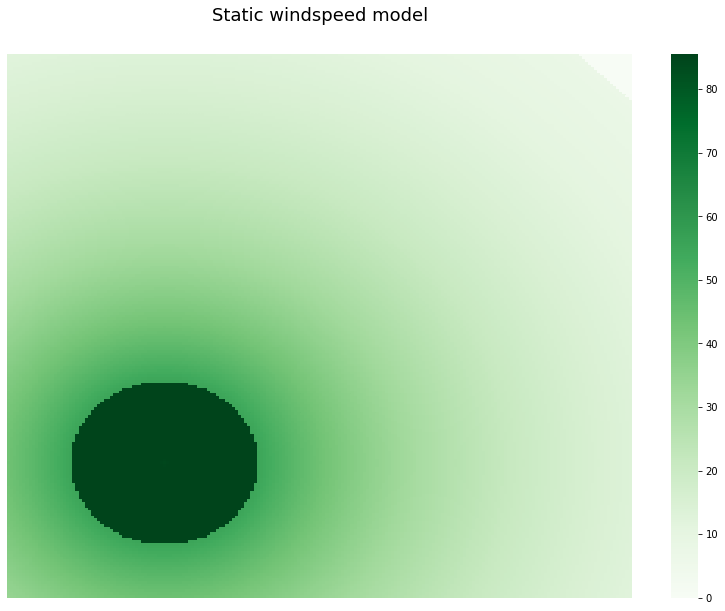

In [81]:
#@title create/access timestep { run: "auto" }
step = 5 #@param {type:"slider", min:0, max:5, step:1}
TS = 'TS' + str(step)
model=timestepadj(xcenters, ycenters, r_mwo, r_so, w_mo)
df = model[TS]

fig, ax = plt.subplots(figsize=(14,10))
title = "Static windspeed model"
plt.title(title, fontsize=18)
ttl = ax.title
ttl.set_position([.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
sns.heatmap(df, annot=False, cmap='Greens', linewidths=0.0, ax=ax)
plt.show()